In [ ]:
import json
import re
import pandas as pd
import urllib
from urllib.request import Request
from bs4 import BeautifulSoup

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://www.otodom.pl/pl/wyniki/sprzedaz/mieszkanie/wiele-lokalizacji?locations=%5Bmalopolskie%2Cmalopolskie%2Fkrakow%2Fkrakow%2Fkrakow%5D&viewType=listing&page="

pages = []
for page_number in range(1, 16):
    print(f'Pobieranie strony {page_number}')
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}#naglowki
    response = requests.get(f'{url}{page_number}', headers=headers)
    processed_page = BeautifulSoup(response.text, "html.parser")
    pages.append(processed_page)



Pobieranie strony 1
Pobieranie strony 2
Pobieranie strony 3
Pobieranie strony 4
Pobieranie strony 5
Pobieranie strony 6
Pobieranie strony 7
Pobieranie strony 8
Pobieranie strony 9
Pobieranie strony 10
Pobieranie strony 11
Pobieranie strony 12
Pobieranie strony 13
Pobieranie strony 14
Pobieranie strony 15


In [ ]:
 pages

[<!DOCTYPE html>
 <html lang="pl"><head data-consent="ignore"><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><link href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/favicon.svg" rel="icon"/><link href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/app-icon.png" rel="apple-touch-icon"/><link href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/app-icon.png" rel="android-touch-icon"/><meta content="1490856384482695" property="fb:app_id"/><meta content="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/fb/fb-image200x200.png?t=20-11-09" property="og:image"/><meta content="website" property="og:type"/><meta content="https://www.otodom.pl/" property="og:url"/><meta content="www.otodom.pl/" property="og:site

In [ ]:
full_apartament_data = []
for page in pages:

    full_apartament_data += page.find_all(class_="css-136g1q2 e88tro00")

In [ ]:
full_apartament_data

[]

In [ ]:
import re

apartaments = []
for apartment_html in full_apartament_data:
    apartament = {}
    apartament['ulica'] = apartment_html.find(class_="css-12h460e efr035y3").text.strip()
    info = apartment_html.find(class_="css-uki0wd e12r8p6s1").text.strip()
    price_str=apartment_html.find(class_="css-1uwck7i e1a3ad6s0").text.strip()
    price_str = price_str.replace('\xa0', '')
    price_str = price_str.replace('zł', ',')
    price_str = price_str.replace(',/m²', '')
    price_parts = price_str.split(',')
    total_price = int(price_parts[0]) if price_parts[0] != 'Zapytaj o cenę' else None
    price_per_m2 = int(price_parts[1]) if len(price_parts) > 1 else None
    apartament['cala_cena'] = total_price
    apartament['cena_za_m2'] = price_per_m2
    pattern = r"Liczba pokoi(\d+) pokojePowierzchnia([\d.]+) m²Piętro(\w+)"
    matches = re.match(pattern, info)
    if matches:
          liczba_pokoi = int(matches.group(1))
          powierzchnia = float(matches.group(2))
          if len(matches.group(3))==6:
            pietro=0
          elif len(matches.group(3))==8:
            pietro=-1
          else:
            pietro = int(matches.group(3))
    apartament['Piętro']= pietro
    apartament['Powierzchnia']= powierzchnia
    apartament['Pokoje']= liczba_pokoi

    apartaments.append(apartament)



In [ ]:
apartaments

[{'ulica': 'Tarnów, małopolskie',
  'cala_cena': 449000,
  'cena_za_m2': 9163,
  'Piętro': 2,
  'Powierzchnia': 49.0,
  'Pokoje': 4},
 {'ulica': 'ul. Duża Góra, Bieżanów, Bieżanów-Prokocim, Kraków, małopolskie',
  'cala_cena': 920000,
  'cena_za_m2': 10952,
  'Piętro': 3,
  'Powierzchnia': 84.0,
  'Pokoje': 3},
 {'ulica': 'ul. Totus Tuus, Białe Morza, Łagiewniki-Borek Fałęcki, Kraków, małopolskie',
  'cala_cena': 1064700,
  'cena_za_m2': 16900,
  'Piętro': 0,
  'Powierzchnia': 63.0,
  'Pokoje': 3},
 {'ulica': 'ul. Szydło, Modlnica, Wielka Wieś, krakowski, małopolskie',
  'cala_cena': 996072,
  'cena_za_m2': 8800,
  'Piętro': 0,
  'Powierzchnia': 113.19,
  'Pokoje': 4},
 {'ulica': 'os. 2 Pułku Lotniczego, Czyżyny, Czyżyny, Kraków, małopolskie',
  'cala_cena': 834000,
  'cena_za_m2': 14100,
  'Piętro': 7,
  'Powierzchnia': 59.15,
  'Pokoje': 3},
 {'ulica': 'ul. Macieja Słomczyńskiego, Górka Narodowa, Prądnik Biały, Kraków, małopolskie',
  'cala_cena': 849000,
  'cena_za_m2': 11958,
  'Pi

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(apartaments)
df['cala_cena'] = df['cala_cena'].replace('cala_cena', np.nan)
df['cala_cena'] = df['cala_cena'].replace('cena_za_m2', np.nan)
df.head(530)

ulica  cala_cena  cena_za_m2  \
0                                  Tarnów, małopolskie   449000.0      9163.0   
1    ul. Duża Góra, Bieżanów, Bieżanów-Prokocim, Kr...   920000.0     10952.0   
2    ul. Totus Tuus, Białe Morza, Łagiewniki-Borek ...  1064700.0     16900.0   
3    ul. Szydło, Modlnica, Wielka Wieś, krakowski, ...   996072.0      8800.0   
4    os. 2 Pułku Lotniczego, Czyżyny, Czyżyny, Krak...   834000.0     14100.0   
..                                                 ...        ...         ...   
525        Wieliczka, Wieliczka, wielicki, małopolskie   838090.0      9500.0   
526  ul. Chotarz Bór, Kościelisko, Kościelisko, tat...        NaN         NaN   
527  ul. Szymony 17E, Zakopane, tatrzański, małopol...        NaN         NaN   
528  ul. Ligustrowa, Libertów, Mogilany, krakowski,...   639000.0      9410.0   
529  ul. Trzebińska, Młoszowa, Trzebinia, chrzanows...   490418.0        40.0   

     Piętro  Powierzchnia  Pokoje  
0         2         49.00       4  
1         3         84.00       3  
2         0         63.00       3  
3         0        113.19       4  
4         7         59.15       3  
..      ...           ...     ...  
525       1         88.22       4  
526       1         88.22       4  
527       1         88.22       4  
528       0         67.91       4  
529       1         70.16       4  

[530 rows x 6 columns]

array([[<Axes: title={'center': 'Pokoje'}>]], dtype=object)

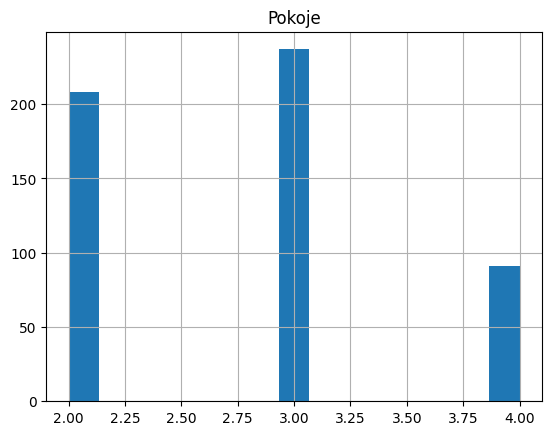

In [ ]:
df.hist(column='Pokoje', bins=15)

In [ ]:
df[ df.cala_cena >= 2000000 ]


ulica  cala_cena  cena_za_m2  \
36   ul. Wielopole, Wesoła Zachód, Stare Miasto, Kr...  2600000.0     25243.0   
91   ul. Lubicz 17, Wesoła Wschód, Grzegórzki, Krak...  2150000.0     27250.0   
158  ul. Poznańska, Krowodrza, Krowodrza, Kraków, m...  2544000.0     20516.0   
171  ul. Bocheńska, Kazimierz, Stare Miasto, Kraków...  2550000.0     19615.0   
205  ul. Brązownicza 14, Małe Błonia, Krowodrza, Kr...  2468200.0     24269.0   
232  ul. Mieczysława Karłowicza, Zakopane, tatrzańs...  2340000.0     30000.0   
254  ul. Emaus, Zwierzyniec, Zwierzyniec, Kraków, m...  2199000.0     21605.0   
259  ul. Emaus, Zwierzyniec, Zwierzyniec, Kraków, m...  2199000.0     21605.0   
276  ul. Starowiślna, Kazimierz, Stare Miasto, Krak...  7533600.0     25800.0   
282  ul. Cichociemnych AK, Łęg, Czyżyny, Kraków, ma...  2129820.0     16500.0   
366  ul. Nadwiślańska, Stare Podgórze, Podgórze, Kr...  2749000.0     28635.0   
367  ul. Śliczna, Rakowice, Prądnik Czerwony, Krakó...  2200000.0     18242.0   
435  ul. Starowiślna, Kazimierz, Stare Miasto, Krak...  7533600.0     25800.0   
484  ul. Jana Buszka, Małe Błonia, Krowodrza, Krakó...  9500000.0     21483.0   
508  ul. Grzegórzecka, Grzegórzki, Grzegórzki, Krak...  2065000.0     21510.0   
524  ul. Juliusza Lea, Bronowice, Bronowice, Kraków...  2143713.0        60.0   

     Piętro  Powierzchnia  Pokoje  
36        3        103.00       3  
91        2         78.90       3  
158       4        124.00       4  
171       3        130.00       3  
205       2        101.70       4  
232       2         78.00       4  
254       2        101.78       4  
259       2        101.78       4  
276       2         50.00       2  
282       3         67.00       3  
366       2         96.00       3  
367      10        120.60       4  
435       0         89.78       4  
484       3         46.97       2  
508       0         96.00       3  
524       2        116.76       4

array([[<Axes: title={'center': 'cala_cena'}>]], dtype=object)

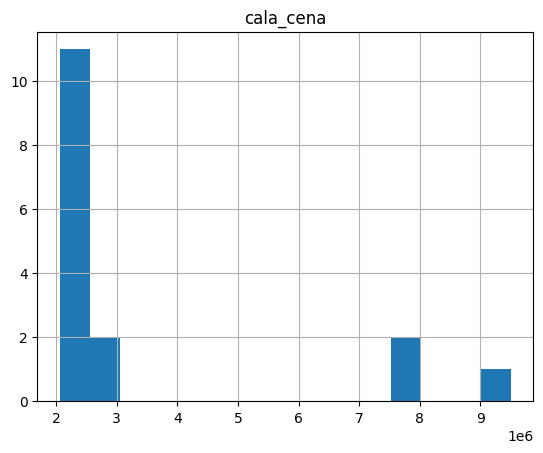

In [ ]:
df[ df.cala_cena >= 2000000 ].hist(column='cala_cena', bins=15)


array([[<Axes: title={'center': 'Piętro'}>]], dtype=object)

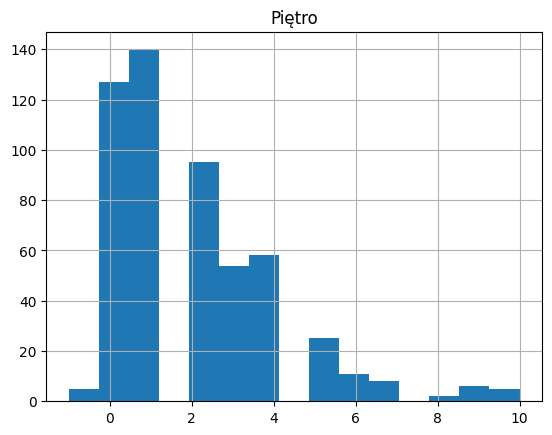

In [ ]:
df.hist(column='Piętro', bins=15)


<Axes: xlabel='cala_cena', ylabel='cena_za_m2'>

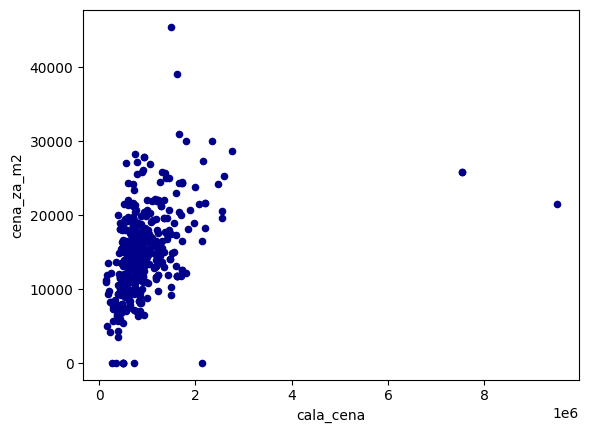

In [ ]:
df.plot.scatter(x='cala_cena', y='cena_za_m2', c='DarkBlue')

Cena mieszkań w zależności od poziomu piętra(0 parter,-1 Suterena)


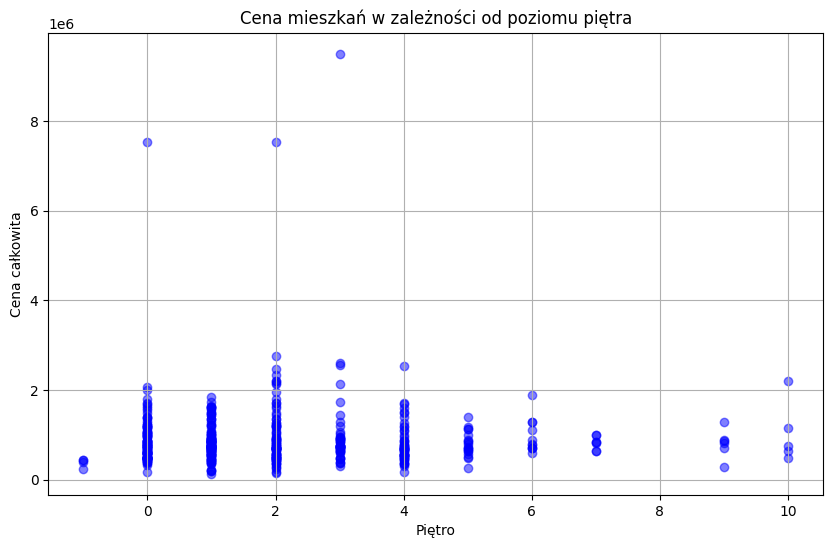

In [ ]:
import matplotlib.pyplot as plt

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.scatter(df['Piętro'], df['cala_cena'], color='blue', alpha=0.5)

# Dodanie tytułu i oznaczeń osi
plt.title('Cena mieszkań w zależności od poziomu piętra')
plt.xlabel('Piętro')
plt.ylabel('Cena całkowita')

# Ustawienie siatki
plt.grid(True)

# Wyświetlenie wykresu
plt.show()

Wykres dostępności mieszkań o powierzchni w okolicy standardu 58m2 i ich cena(+- 10 m2 w obydwie strony)


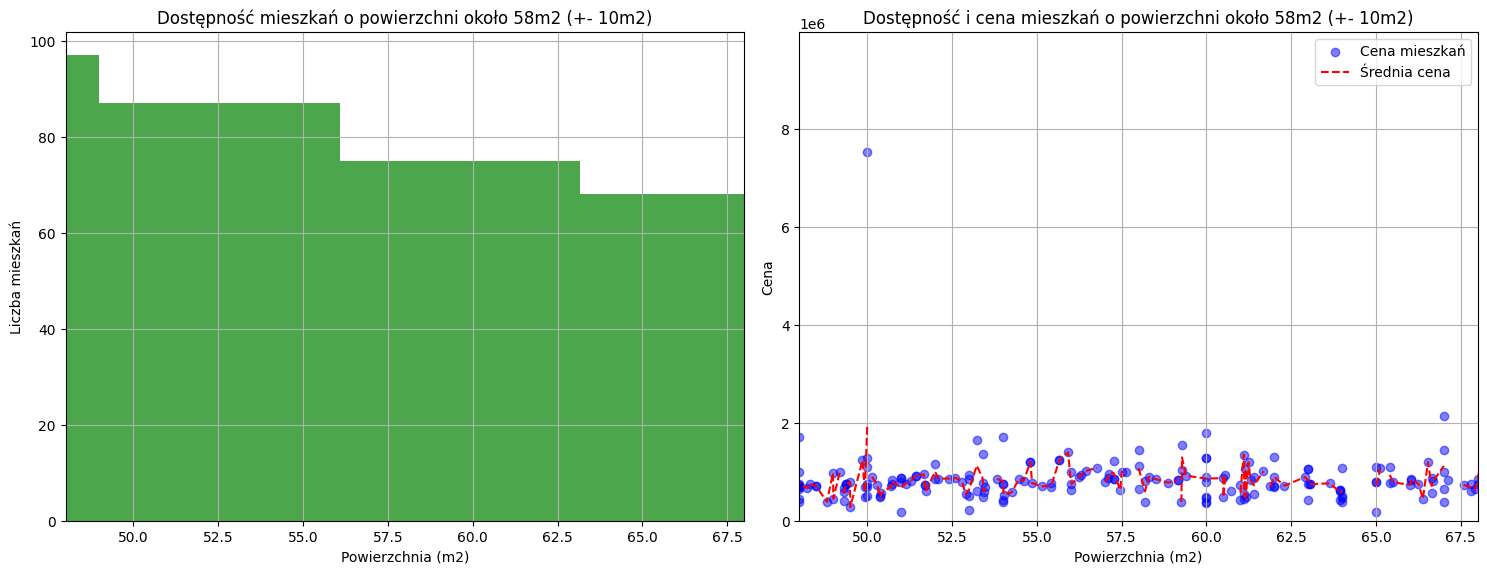

In [ ]:
import matplotlib.pyplot as plt

# Tworzenie subplotów
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Pierwszy subplot - histogram
axs[0].hist(df['Powierzchnia'], bins=20, color='green', alpha=0.7)
axs[0].set_xlim(48, 68)
axs[0].set_title('Dostępność mieszkań o powierzchni około 58m2 (+- 10m2)')
axs[0].set_xlabel('Powierzchnia (m2)')
axs[0].set_ylabel('Liczba mieszkań')
axs[0].grid(True)

# Drugi subplot - histogram i wykres punktowy
axs[1].hist(df['Powierzchnia'], bins=20, color='green', alpha=0.7)
axs[1].set_xlim(48, 68)
axs[1].scatter(df[(df['Powierzchnia'] >= 48) & (df['Powierzchnia'] <= 68)]['Powierzchnia'],
               df[(df['Powierzchnia'] >= 48) & (df['Powierzchnia'] <= 68)]['cala_cena'],
               color='blue', alpha=0.5, label='Cena mieszkań')

# Dodanie wykresu prostej średniej ceny
mean_prices = df.groupby('Powierzchnia')['cala_cena'].mean()
axs[1].plot(mean_prices.index, mean_prices.values, color='red', linestyle='--', label='Średnia cena')

axs[1].set_title('Dostępność i cena mieszkań o powierzchni około 58m2 (+- 10m2)')
axs[1].set_xlabel('Powierzchnia (m2)')
axs[1].set_ylabel('Cena')
axs[1].legend()
axs[1].grid(True)

# Wyświetlenie subplotów
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Definicja zakresów powierzchni co 0.5 metra kwadratowego
powierzchnie = np.arange(48, 68.5, 0.5)

# Obliczenie średniej ceny dla każdego zakresu powierzchni
for powierzchnia in powierzchnie:
    srednia_cena = df[(df['Powierzchnia'] >= powierzchnia) & (df['Powierzchnia'] < powierzchnia + 0.5)]['cala_cena'].mean()
    print(f"Średnia cena dla powierzchni {powierzchnia:.1f} - {powierzchnia + 0.5:.1f} m2: {srednia_cena:.2f}")


Średnia cena dla powierzchni 48.0 - 48.5 m2: 760755.33
Średnia cena dla powierzchni 48.5 - 49.0 m2: 689450.00
Średnia cena dla powierzchni 49.0 - 49.5 m2: 678350.67
Średnia cena dla powierzchni 49.5 - 50.0 m2: 669250.00
Średnia cena dla powierzchni 50.0 - 50.5 m2: 1362113.00
Średnia cena dla powierzchni 50.5 - 51.0 m2: 764740.00
Średnia cena dla powierzchni 51.0 - 51.5 m2: 763375.00
Średnia cena dla powierzchni 51.5 - 52.0 m2: 745872.75
Średnia cena dla powierzchni 52.0 - 52.5 m2: 931000.00
Średnia cena dla powierzchni 52.5 - 53.0 m2: 737000.00
Średnia cena dla powierzchni 53.0 - 53.5 m2: 789805.91
Średnia cena dla powierzchni 53.5 - 54.0 m2: 860000.00
Średnia cena dla powierzchni 54.0 - 54.5 m2: 743262.12
Średnia cena dla powierzchni 54.5 - 55.0 m2: 995841.75
Średnia cena dla powierzchni 55.0 - 55.5 m2: 717848.33
Średnia cena dla powierzchni 55.5 - 56.0 m2: 1285666.67
Średnia cena dla powierzchni 56.0 - 56.5 m2: 867653.33
Średnia cena dla powierzchni 56.5 - 57.0 m2: 1080000.00
Średnia